[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab2_partA.ipynb)

## Lab 2: Part A: Logistic regression and GDA
We explore logistic regression and GDA in this notebook on several simple data sets.

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


!git clone https://github.com/sdevika/MLBootCamp/


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Cloning into 'MLBootCamp'...
remote: Counting objects: 169, done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 169 (delta 64), reused 68 (delta 16), pack-reused 0
Receiving objects: 100% (169/169), 7.75 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Already Cloned Repo


### Unregularized logistic regression

In [2]:


data = pd.read_csv('MLBootCamp/data/ex1data1.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[np.where(y==0)]
    X1 = X[np.where(y==1)]
    plt.scatter(X0[:,0],X0[:,1],c='red', s=40, label = legend[0])
    plt.scatter(X1[:,0],X1[:,1],c='green', s = 40, label=legend[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right")

plot_twoclass_data(X,y,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])

FileNotFoundError: File b'MLBootCamp/data/ex1data1.txt' does not exist

## Fit logistic model and visualize decision boundary

In [6]:
alpha = 1e-5
logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
logreg.fit(X,y)

print("Theta found by sklearn: ", logreg.coef_, logreg.intercept_)

def plot_decision_boundary_logistic(X,y,logreg,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    Z = np.array(logreg.predict(np.c_[xx1.ravel(), xx2.ravel()]))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])

plot_decision_boundary_logistic(X,y,logreg,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])


NameError: name 'linear_model' is not defined

## Predicting with a logistic regression model

In [4]:
#  calculate the probability of a student being admitted with score of 45,85

pred_prob = logreg.predict_proba(np.array([[45,85]]))[0][1]
print("For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = ", pred_prob)

# compute accuracy on the training set

predy = logreg.predict(X)

# calculate the accuracy of predictions on training set 

accuracy = np.mean(predy==y)
print("Accuracy on the training set = ", accuracy)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = ", pred_prob)? (<ipython-input-4-2c3dbdf19ff5>, line 4)

## Regularized logistic regression

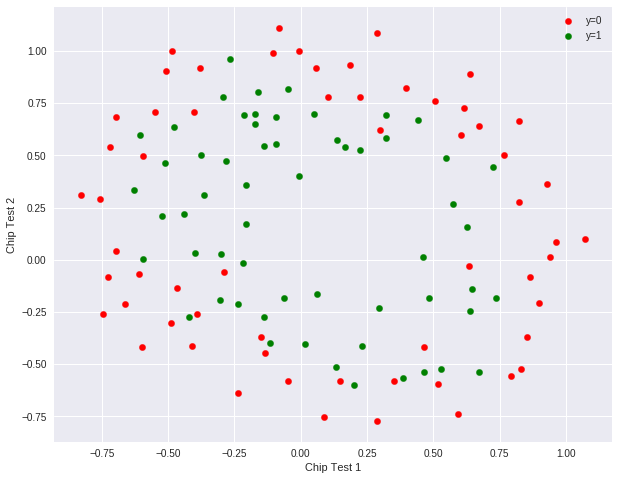

In [64]:
data = pd.read_csv('MLBootCamp/data/ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

## Expanding basis functions and regularizing logistic regression

In [5]:
# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

alpha = 1.0

polynomial_features = PolynomialFeatures(degree=5,include_bias=False)
logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic", logreg)])
pipeline.fit(X, y)


print("Theta found by logistic regression with L2 reg: ", logreg.coef_[0], logreg.intercept_)

# accuracy on training set 

predy = pipeline.predict(X)
print("Accuracy on training set for sklearn theta = ", np.mean(predy==y))
score = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
print("Accuracy in 10 fold CV = ", np.mean(score), '+/-', np.std(score))

def plot_decision_boundary_logreg_poly(X,y,pipeline,reg,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    Z = np.array(pipeline.predict(np.c_[xx1.ravel(), xx2.ravel()]))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    plt.title("Decision boundary for lambda = " + str(reg))

plot_decision_boundary_logreg_poly(X,y,pipeline,alpha,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

NameError: name 'linear_model' is not defined

## Try this!
Experiment with various values of the regularization parameter in the cell above and comment on accuracies as well 
 as decision boundary shape. Try values of 0.001, 0.01, 0.1, 1.0, 10.0


## Selecting best alpha by cross validation

In [6]:
# What is the best value for the regularization term?

# to find the optimal value of alpha, select the highest degree you want to work with
# and then sweep through the alphas on a logarithmic scale

n_alphas = 100
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    polynomial_features = PolynomialFeatures(degree=6,
                                             include_bias=False)
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
    pipeline.fit(X, y)
    score = cross_val_score(pipeline, X, y,
                             scoring='accuracy', cv=10)
    scores.append(np.mean(score))

    
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'linear_model' is not defined

## Building final model with best alpha

In [7]:
# build the final model with the optimal alpha
best_alpha = alphas[scores.index(max(scores))]


polynomial_features = PolynomialFeatures(degree=6,
                                             include_bias=False)
logreg = linear_model.LogisticRegression(C=1.0/best_alpha,solver='lbfgs',fit_intercept=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
pipeline.fit(X, y)
score = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
print("Accuracy in 10 fold CV = ", np.mean(score), '+/-', np.std(score))
plot_decision_boundary_logreg_poly(X,y,pipeline,best_alpha,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

ValueError: max() arg is an empty sequence

## Regularizing logistic regression with L1 norm


Theta found by logistic with L1 penalty:  [[ 0.68677011  1.28053724 -4.86297337 -1.62201289 -2.34497016  0.
   0.          0.          0.          0.          0.          0.
   0.         -2.36492056  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]] [1.87010138]
Accuracy on training set =  0.7966101694915254
Accuracy in 10 fold CV =  0.6621212121212121 +/- 0.2348289336925362


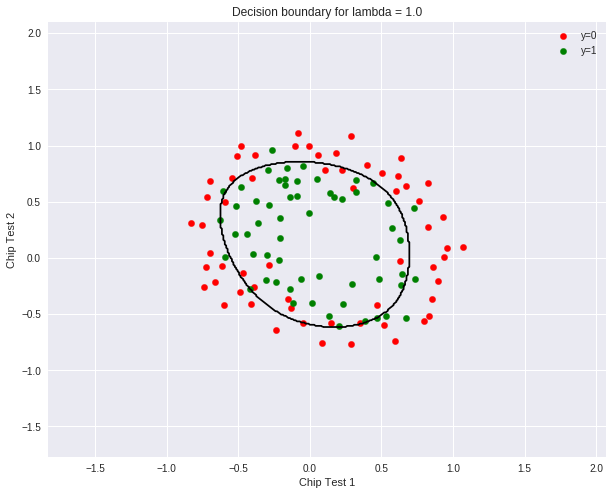

In [77]:
# impose L1 penalty rather than L2; need to use liblinear solver
alpha = 1.0

polynomial_features = PolynomialFeatures(degree=6,
                                             include_bias=False)
logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True,penalty='l1')
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
pipeline.fit(X, y)
print("Theta found by logistic with L1 penalty: ", logreg.coef_, logreg.intercept_)
predy = pipeline.predict(X)
print("Accuracy on training set = ", np.mean(predy==y))
score = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
print("Accuracy in 10 fold CV = ", np.mean(score), '+/-', np.std(score))



plot_decision_boundary_logreg_poly(X,y,pipeline,alpha,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

## Finding the best value for L1 regularization paremeter

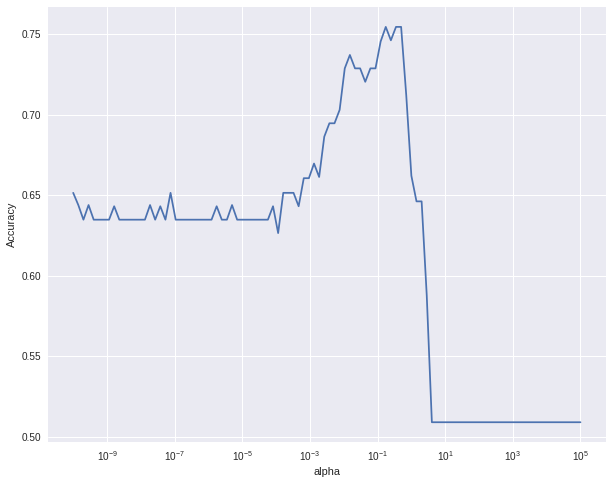

In [78]:
#  What is the best value for the regularization term?

# to find the optimal value of alpha, select the highest degree you want to work with
# and then sweep through the alphas on a logarithmic scale

n_alphas = 100
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    polynomial_features = PolynomialFeatures(degree=6,
                                             include_bias=False)
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True,penalty='l1')
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
    pipeline.fit(X, y)
    score = cross_val_score(pipeline, X, y,
                             scoring='accuracy', cv=10)
    scores.append(np.mean(score))

plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

Accuracy in 10 fold CV =  0.7545454545454546 +/- 0.16814768968491012


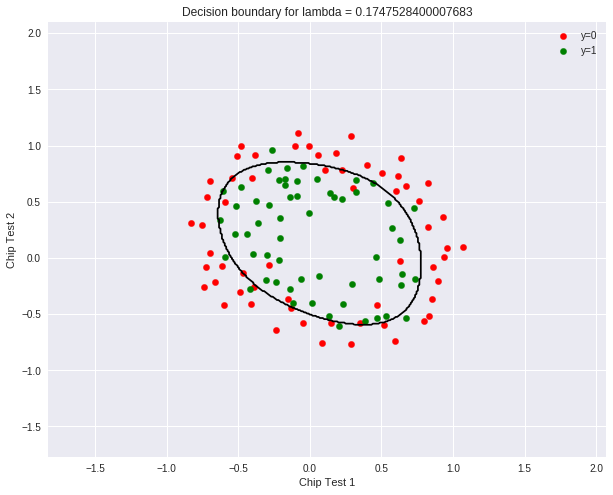

In [79]:
# build the final model with the optimal alpha
best_alpha = alphas[scores.index(max(scores))]


polynomial_features = PolynomialFeatures(degree=6,
                                             include_bias=False)
logreg = linear_model.LogisticRegression(C=1.0/best_alpha,solver='liblinear',fit_intercept=True,penalty='l1')
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
pipeline.fit(X, y)
score = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
print("Accuracy in 10 fold CV = ", np.mean(score), '+/-', np.std(score))
plot_decision_boundary_logreg_poly(X,y,pipeline,best_alpha,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

## LDA and QDA on synthetic data

Text(0.5,1,u'QDA')

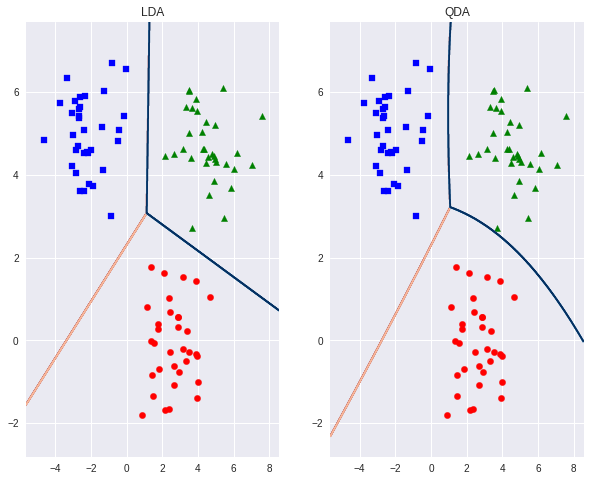

In [61]:
# GDA on synthetic data

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X, y = make_blobs(n_samples=100, n_features=2, centers=[(-2,5),(3,0),(5,5)])

lda = LDA()
lda.fit(X,y)

qda = QDA()
qda.fit(X,y)

def plot_decision_boundary_lda(X,y,lda,   legend):
    plt.scatter(X[y==0,0],X[y==0,1],s=40,marker='s',color='b')
    plt.scatter(X[y==1,0],X[y==1,1],s=40,marker='o',color='r')
    plt.scatter(X[y==2,0],X[y==2,1],s=40,marker='^',color='g')
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    
    # make predictions on this mesh
    Z = np.array(lda.predict(np.c_[xx1.ravel(), xx2.ravel()]))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap='RdBu')

plt.figure()
plt.subplot(1,2,1)
plot_decision_boundary_lda(X,y,lda,['Class 1','Class 2','Class3'])
plt.title('LDA')
plt.subplot(1,2,2)
plot_decision_boundary_lda(X,y,qda,['Class 1','Class 2','Class3'])
plt.title('QDA')



## GDA with IRIS data

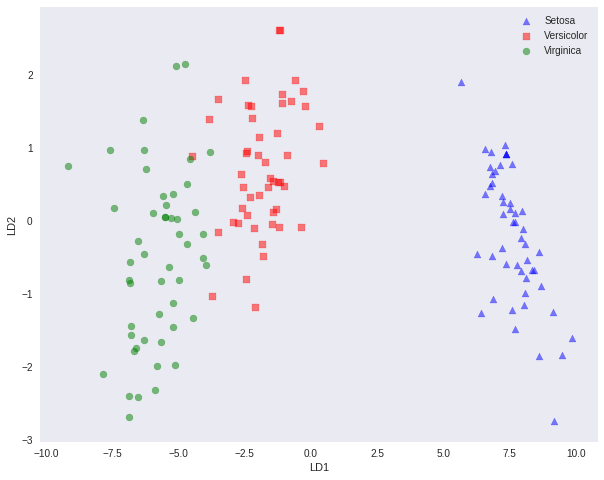

In [48]:
# Gaussian Discriminant Analysis for IRIS data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets

iris = sklearn.datasets.load_iris()
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

X = iris.data
y = iris.target

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)


def plot_iris_lda(X):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label]
                    )

    plt.xlabel('LDA1')
    plt.ylabel('LDA2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_iris_lda(X_lda_sklearn)

In [35]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])